### RGB Task 

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar100


CLASS_NAMES = sorted(['beaver', 'dolphin', 'otter', 'seal', 'whale',  # aquatic mammals
                           'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',  # fish
                           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', # flowers
                           'bottles', 'bowls', 'cans', 'cups', 'plates', # food containers
                           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', # fruit and vegetables
                           'clock', 'keyboard', 'lamp', 'telephone', 'television', # household electrical devices
                           'bed', 'chair', 'couch', 'table', 'wardrobe', # household furniture
                           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', # insects
                           'bear', 'leopard', 'lion', 'tiger', 'wolf', # large carnivores
                           'bridge', 'castle', 'house', 'road', 'skyscraper', # large man-made outdoor things
                           'cloud', 'forest', 'mountain', 'plain', 'sea', # large natural outdoor scenes
                           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', # large omnivores and herbivores
                           'fox', 'porcupine', 'possum', 'raccoon', 'skunk', # medium-sized mammals
                           'crab', 'lobster', 'snail', 'spider', 'worm', # non-insect invertebrates
                           'baby', 'boy', 'girl', 'man', 'woman', # people
                           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', # reptiles
                           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', # small mammals
                           'maple', 'oak', 'palm', 'pine', 'willow', # trees
                           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', # vehicles 1
                           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor' # vehicles 2
                          ])

(train_images, train_targets), (test_images, test_targets) = cifar100.load_data()

print(np.unique(test_targets))
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


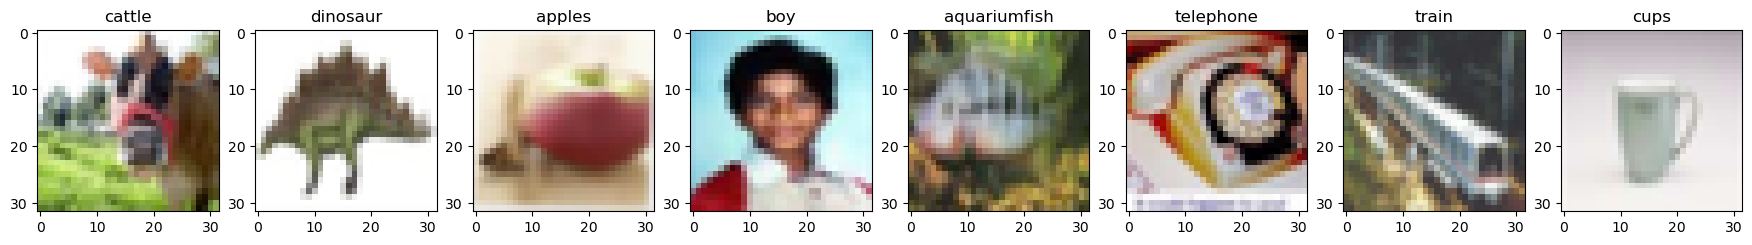

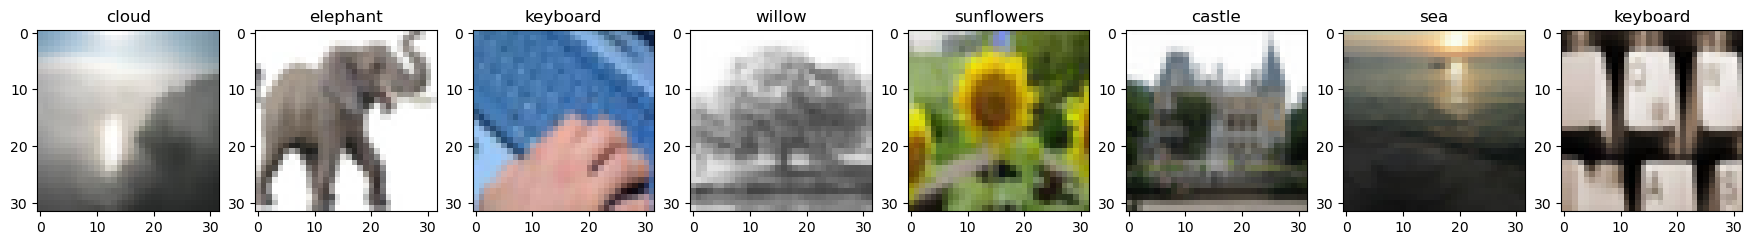

In [2]:
import matplotlib.pyplot as plt

# 이미지 출력 함수
def show_images(images, targets, ncols=8):
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])

        # target의 차원 수를 1로 맞추기 위해 squeeze 사용
        target = targets[i].squeeze()
        axes[i].set_title(CLASS_NAMES[int(targets[i])])

show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [3]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# images MinMaxScaling 함수 선언
def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [4]:
# images 스케일링
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [5]:
# (batch_size, 1) 형식으로 된 target의 차원 수를 (batch_size,) 형태의 1차원으로 맞춰줌 
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

# images와 targets의 shape 출력
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# 이미지의 가로, 세로
IMAGE_SIZE = 32

# input - 가로 * 세로 * 3 (채널 수, RGB)
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolution Backbone
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)

# 배치 정규화
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Classifier
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5, name='classfierA_Dropout01')(x)

x = Dense(500, activation='relu', kernel_initializer='he_normal', name='classfierA_Dense02')(x)
x = Dropout(rate=0.5, name='classfierA_Dropout03')(x)

# 클래스가 100가지 있었으므로 output의 Dense도 100으로 설정
output = Dense(100, activation='softmax', kernel_initializer='glorot_normal', name='output')(x)

# 모델 생성 및 요약
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 256)                 │              

 Total params: 1,290,408 (4.92 MB)

 Trainable params: 1,288,744 (4.92 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# SparseCategoricalCrossentropy: 원핫 인코딩 없이도 컴파일을 가능하게 해준다
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback (ModelCheckpoint) 선언
# val_loss의 최소값이 갱신될 때마다 가중치 파일 생성
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

# callback (ReduceLROnPlateau) 선언
# epoch 3회 동안 val_loss의 최소값이 갱신되지 않으면, 다음 epoch의 learning rate가 1/10로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

# callback (EarlyStopping) 선언
# epoch 5회 동안 val_loss의 최소값이 갱신되지 않으면 학습 조기 종료
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [27]:
# validation_split: train 데이터 중 일정 비율을 validation 데이터로 자동 분리해준다
# validation 데이터 따로 분리할 필요 없음
history = model.fit(x=train_images, 
                    y=train_targets, 
                    batch_size=8, 
                    epochs=30, 
                    validation_split=0.2, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 97ms/step - acc: 0.0409 - loss: 4.4311 - val_acc: 0.1079 - val_loss: 3.7839 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 124s 99ms/step - acc: 0.1128 - loss: 3.7071 - val_acc: 0.1578 - val_loss: 3.3873 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 113ms/step - acc: 0.1819 - loss: 3.3242 - val_acc: 0.2002 - val_loss: 3.2859 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 117ms/step - acc: 0.2277 - loss: 3.0298 - val_acc: 0.2346 - val_loss: 3.0428 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 152s 122ms/step - acc: 0.2678 - loss: 2.8062 - val_acc: 0.3039 - val_loss: 2.6965 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 176s 101ms/step - acc: 0.3110 - loss: 2.6016 - val_acc: 0.3313 - val_loss: 2.5713 - learning_rate: 0.0010
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 153s 123ms/step - acc: 0.3493 - loss: 2.4270 - val_acc: 0.3651 - val_los

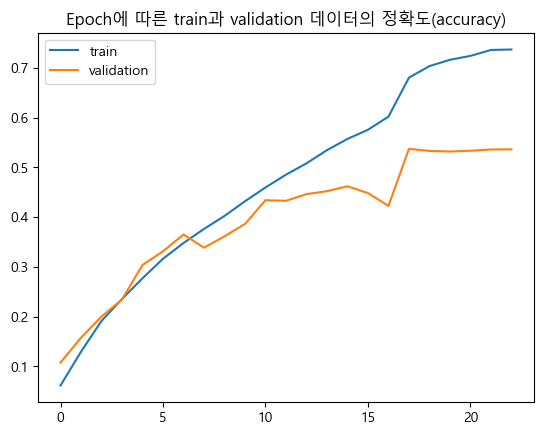

In [28]:
import matplotlib.pyplot as plt

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 각 epoch 별 train과 validation 데이터의 정확도 변화를 시각화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
# plt.xlim(-1, 13)
# plt.ylim(0, 0.2)
plt.legend()
plt.title('Epoch에 따른 train과 validation 데이터의 정확도(accuracy)')
plt.show()

In [30]:
# 모델 성능 평가
model.evaluate(test_images, test_targets, batch_size=8)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - acc: 0.5402 - loss: 1.8669


[1.8503063917160034, 0.5353000164031982]

In [ ]:
# 새로운 모델 생성 후 파일로 생성한 가중치 부여
model = create_model()
model.load_weights('./callback_files/weights.020-0.3276-0.9311.weights.h5')

# 위 파일의 가중치로 모델 컴파일링 후 평가
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.evaluate(test_images, test_oh_targets, batch_size=32)